# D5 : Modèle de Hopfield
---

Dans le dernier cours et le TD associé, nous avons étudié le modèle de Hopfield : C'est un modèle simplifié pour expliquer comment des motifs (mémoires) peuvent être stockés dans les connexions synaptiques et être récupérés par la dynamique du réseau. C'est l'archétype d'un réseau attracteur, dont le mécanisme sousjacent a par la suite également été démontré fonctionner avec des modèles de réseau plus compliqué (réseau à spike, modèles de taux de décharge etc.). 

Dans ce devoir, nous allons continuer à nous familiariser avec le modèle de Hopfield. Veuillez vous référer aux diapos du cours et les équations dans le notebook du TD associé pour la définition précise du modèle.


In [1]:
# imports 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Récupération d'un motif, $K=1$

Dans le TD, nous avons simulé l'évolution d'un réseau dont les poids synaptiques étaient choisis pour encoder un smiley. Pour une valeur de $\beta$ suffisamment grande (approx. $\beta>2$ dans le cas étudié), le réseau évolue dans le sens souhaité, c'est-à-dire réproduit petit à petit le motif stocké. 

Reproduisez ici, pour $\beta=5$, l'évolution du réseau pour un autre motif : au lieu d'importer le fichier 'smiley.dat', vous pouvez choisir 'wolf.dat' ou 'flowers.dat'. A part ce remplacement, le code du TD devrait être parfaitement re-utilisable (veillez juste à choisir le bon $\beta$).

In [2]:
# import an image that we will use as first motif
img = np.loadtxt('flowers.dat')
nx, ny = img.shape

# create our Hopfield net
# -----------------------

# convert the 2D pixel matrix to a 1D pattern vector
P0 = img.flatten()

# the network size is given by the length of the pattern
N = len(P0)

# for a single pattern, the weight matrix is given by
W = P0[:,None] * P0[None,:] / N

# enforce empty diagonal (no self-connections)
W[np.arange(N),np.arange(N)] = 0

In [3]:
W.shape

(4096, 4096)

In [4]:
# define some useful functions you can use below
# ----------------------------------------------

# gain function
def g(h, beta=1.):
    """Gain function: probability of a neuron to be 
    in the active state given the input h, for a 
    given value of beta (default value 1)."""
    return 1/(1+np.exp(-beta*h))


# overlap between a given pattern and a state
def overlap(state, pattern):
    return sum(state*pattern)/N


# a plot function to easily plot the 
# network state as an image
def plot_state(state):
    plt.imshow(state.reshape((nx,ny)), cmap='Greys_r')
    plt.pause(1)

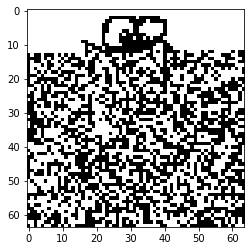

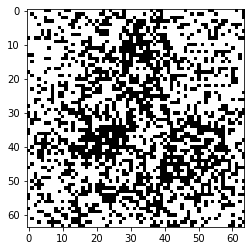

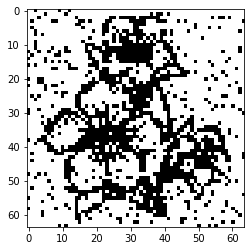

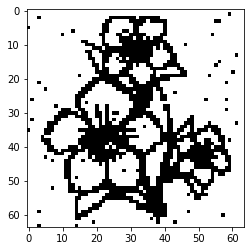

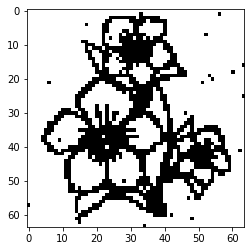

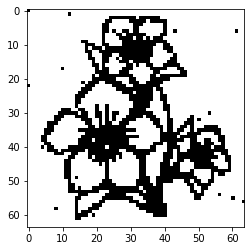

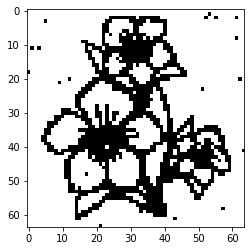

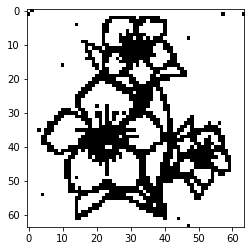

In [5]:
nt = 8

# noisy initial state
# NOTE: values must be either -1 or 1
S = np.zeros((nt,N))
S[0] = 2*np.round(np.random.uniform(size=N)) - 1

# add partial overlap to the initial state
S[0,:800] = P0[:800]

plot_state(S[0])

# boucle sur les différents temps
for i in range(nt-1):
    # calculer les entrées:
    # h_i = sum_j W_ij * S_j(t)
    # --> use "vector = matrix * vector"
    # to calculate all components at once
    h = W.dot(S[i])
    
    # calculer la probabilité d'être actif
    prob_actif = g(h,beta=5)
    
    # tirer nombres aleatoires pour savoir si actif ou pas
    actif = np.random.rand(N) < prob_actif
    
    # transformer en -1 ou 1
    S[i+1] = 2*actif - 1  
    
    plot_state(S[i+1])
    
    

Text(0, 0.5, 'overlap $m$')

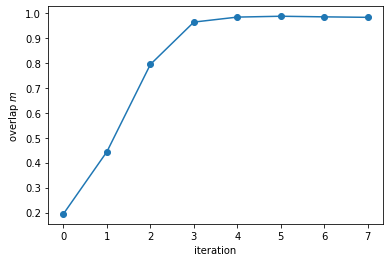

In [6]:
# calculate overlap and plot
m = np.array([overlap(P0, s) for s in S])

fig, ax = plt.subplots()
ax.plot(np.arange(nt), m, 'o-')
ax.set_xlabel('iteration')
ax.set_ylabel('overlap $m$')



### 2. Récupération d'un motif, $K=3$

Dans le cours, nous avons vu que la capacité maximale d'un réseau de Hopfield est $K_c=0.138 N$, ce qui dans notre cas ($N=4096$) suggère que le réseau peut stocker jusqu'à 565 motifs différents. On va faire plus simple et n'en considérer que trois. 

Construisez un réseau de Hopfield avec des connexions synaptiques pour stocker les trois motifs 'smiley.dat', 'wolf.dat' et 'flowers.dat'. Pour cela, créez / définissez d'abord les trois arrays P0, P1, et P2 pour chaque motif respectif. Rappelez-vous que la matrice de connectivité et ensuite donnée par la superposition des matrices de connectivité qu'on obtiendrait pour un chaque motif individuellement.

In [7]:
# For simplicity, here are the three patterns:
P0 = np.loadtxt('smiley.dat').flatten()
P1 = np.loadtxt('wolf.dat').flatten()
P2 = np.loadtxt('flowers.dat').flatten()

P = [P0, P1, P2]

# add the weights related to each pattern
W = P0[:,None] * P0[None,:]
W += P1[:,None] * P1[None,:]
W += P2[:,None] * P2[None,:]

W /= N

# enforce empty diagonal (no self-connections)
W[np.arange(N),np.arange(N)] = 0

Maintenant que vous avex créé le réseau, simulez l'évolution pour des conditions initiales différentes (voir ci-dessous). Pour chaque condition, calculez l'overlap avec chacun des trois motifs, et plottez comment les overlaps évoluent avec le temps.

(Dans le code suivant, je suppose que la variable `S` représente toujours l'état du reseau aux différents moments et est une matrice avec la forme `(nt,N)`.)


**Attention :** Il faut choisir une valeur de $\beta$ suffisamment élevée pour pouvoir récupérer les motifs (essayez par ex. avec $\beta=100$) !


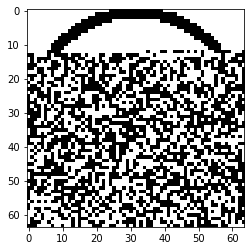

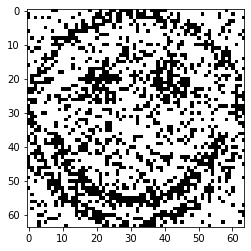

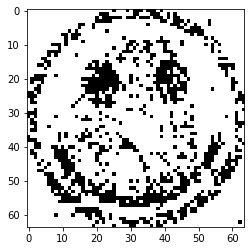

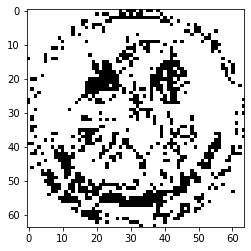

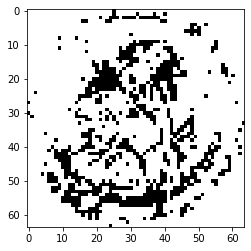

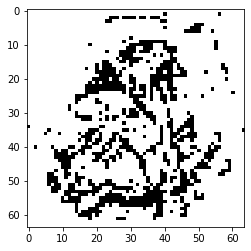

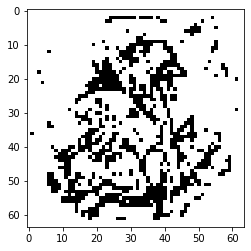

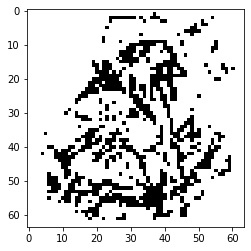

In [8]:
# 1) Initial overlap with first pattern
S[0] = 2*np.round(np.random.uniform(size=N))-1 # clear previous initial condition
S[0,:800] = P0[:800] # partial overlap (first 800 neurons)

plot_state(S[0])

# boucle sur les différents temps
for i in range(nt-1):
    # calculer les entrées:
    # h_i = sum_j W_ij * S_j(t)
    # --> use "vector = matrix * vector"
    # to calculate all components at once
    h = W.dot(S[i])
    
    # calculer la probabilité d'être actif
    prob_actif = g(h,beta=5)
    
    # tirer nombres aleatoires pour savoir si actif ou pas
    actif = np.random.rand(N) < prob_actif
    
    # transformer en -1 ou 1
    S[i+1] = 2*actif - 1  
    
    plot_state(S[i+1])

Text(0, 0.5, 'overlap $m$')

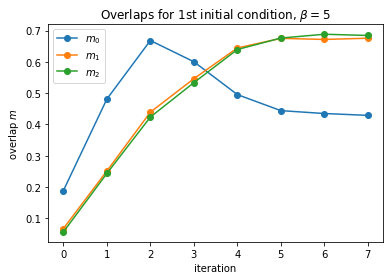

In [9]:
# calculate overlap and plot
m = np.array([[overlap(p, s) for s in S] for p in P])

fig, ax = plt.subplots()
ax.set_title(r'Overlaps for 1st initial condition, $\beta=5$')
for i in range(3):
    ax.plot(np.arange(nt), m[i], 'o-', label='$m_%d$'%i)
ax.legend()
ax.set_xlabel('iteration')
ax.set_ylabel('overlap $m$')

In [10]:
print(-W.dot(S[-1]).T.dot(S[-1]))

-4541.6298828125


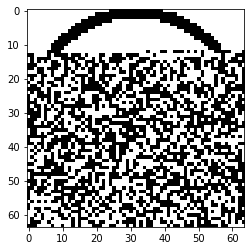

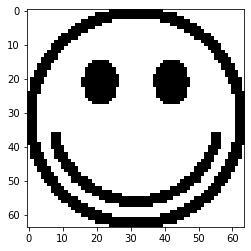

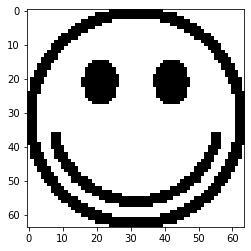

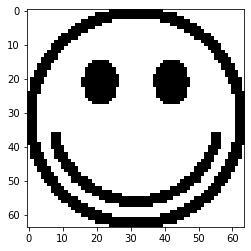

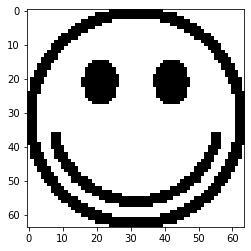

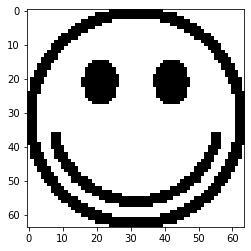

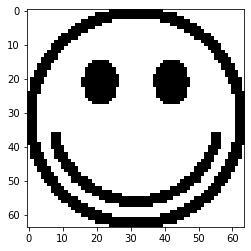

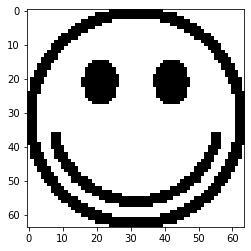

In [11]:
plot_state(S[0])

# boucle sur les différents temps
for i in range(nt-1):
    # calculer les entrées:
    # h_i = sum_j W_ij * S_j(t)
    # --> use "vector = matrix * vector"
    # to calculate all components at once
    h = W.dot(S[i])
    
    # calculer la probabilité d'être actif
    prob_actif = g(h,beta=100)
    
    # tirer nombres aleatoires pour savoir si actif ou pas
    actif = np.random.rand(N) < prob_actif
    
    # transformer en -1 ou 1
    S[i+1] = 2*actif - 1  
    
    plot_state(S[i+1])

In [12]:
print(-W.dot(S[-1]).T.dot(S[-1]))

-4335.158203125


Text(0, 0.5, 'overlap $m$')

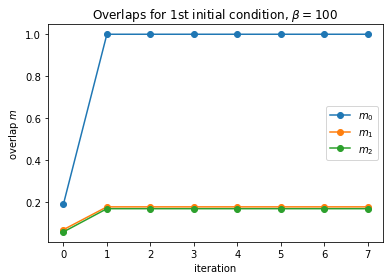

In [13]:
# calculate overlap and plot
m = np.array([[overlap(p, s) for s in S] for p in P])

fig, ax = plt.subplots()
ax.set_title(r'Overlaps for 1st initial condition, $\beta=100$')
for i in range(3):
    ax.plot(np.arange(nt), m[i], 'o-', label='$m_%d$'%i)
ax.legend()
ax.set_xlabel('iteration')
ax.set_ylabel('overlap $m$')

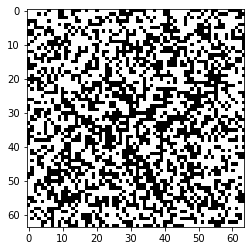

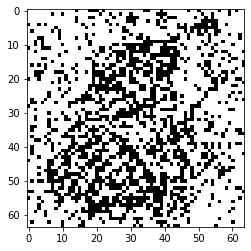

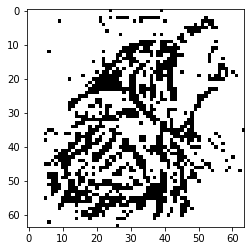

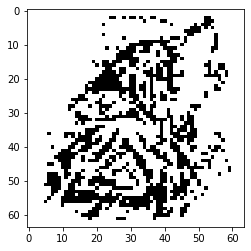

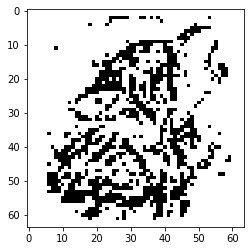

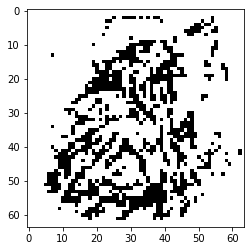

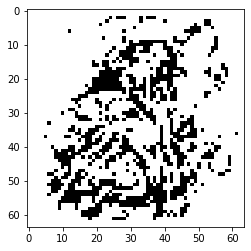

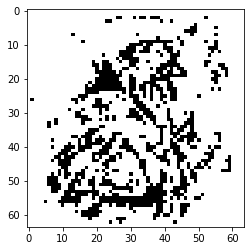

In [14]:
# 2) Initial overlap with second pattern
#    NOTE: we can choose a random subset of pixels for the overlap
S[0] = 2*np.round(np.random.uniform(size=N))-1 # clear previous initial condition
# pick 800 indices among the N possible indices:
overlapping = np.random.choice(np.arange(N), size=800, replace=False) 
S[0,overlapping] = P1[overlapping]

plot_state(S[0])

beta = 5

# boucle sur les différents temps
for i in range(nt-1):
    # calculer les entrées:
    # h_i = sum_j W_ij * S_j(t)
    # --> use "vector = matrix * vector"
    # to calculate all components at once
    h = W.dot(S[i])
    
    # calculer la probabilité d'être actif
    prob_actif = g(h,beta=beta)
    
    # tirer nombres aleatoires pour savoir si actif ou pas
    actif = np.random.rand(N) < prob_actif
    
    # transformer en -1 ou 1
    S[i+1] = 2*actif - 1  
    
    plot_state(S[i+1])

Text(0, 0.5, 'overlap $m$')

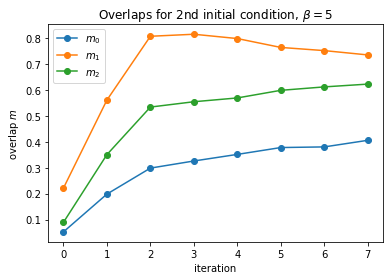

In [15]:
# calculate overlap and plot
m = np.array([[overlap(p, s) for s in S] for p in P])

fig, ax = plt.subplots()
ax.set_title(r'Overlaps for 2nd initial condition, $\beta=%g$'%beta)
for i in range(3):
    ax.plot(np.arange(nt), m[i], 'o-', label='$m_%d$'%i)
ax.legend()
ax.set_xlabel('iteration')
ax.set_ylabel('overlap $m$')

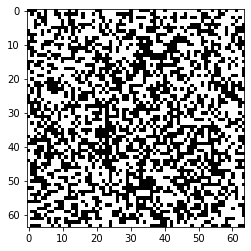

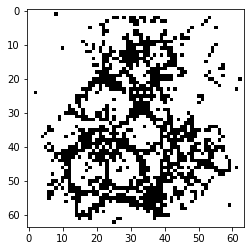

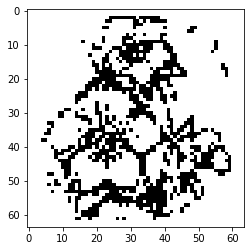

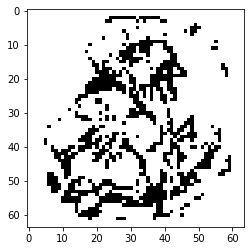

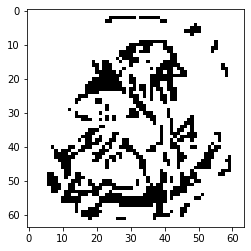

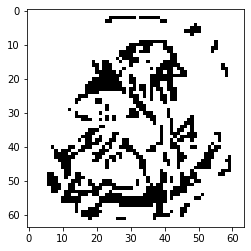

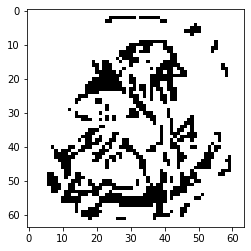

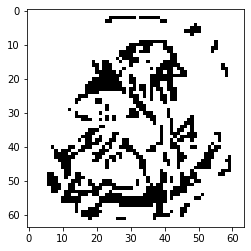

In [16]:
# 3) Initial overlap with two patterns
S[0] = 2*np.round(np.random.uniform(size=N))-1 # clear previous initial condition
# pick 400 indices among the first N/2 possible indices:
overlapping1 = np.random.choice(np.arange(N//2), size=400, replace=False) 
S[0,overlapping1] = P1[overlapping1]
# pick 400 indices among the second N/2 possible indices:
overlapping2 = np.random.choice(np.arange(N//2,N), size=400, replace=False) 
S[0,overlapping2] = P2[overlapping2]


plot_state(S[0])

beta = 20

# boucle sur les différents temps
for i in range(nt-1):
    # calculer les entrées:
    # h_i = sum_j W_ij * S_j(t)
    # --> use "vector = matrix * vector"
    # to calculate all components at once
    h = W.dot(S[i])
    
    # calculer la probabilité d'être actif
    prob_actif = g(h,beta=beta)
    
    # tirer nombres aleatoires pour savoir si actif ou pas
    actif = np.random.rand(N) < prob_actif
    
    # transformer en -1 ou 1
    S[i+1] = 2*actif - 1  
    
    plot_state(S[i+1])

Text(0, 0.5, 'overlap $m$')

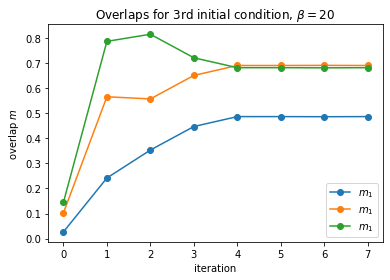

In [17]:
# calculate overlap and plot
m = np.array([[overlap(p, s) for s in S] for p in P])

fig, ax = plt.subplots()
ax.set_title(r'Overlaps for 3rd initial condition, $\beta=%g$'%beta)
for i in range(3):
    ax.plot(np.arange(nt), m[i], 'o-', label='$m_1$')
ax.legend()
ax.set_xlabel('iteration')
ax.set_ylabel('overlap $m$')